In [16]:
import pandas as pd
import re
from io import StringIO
import numpy as np
import base64
import random

In [17]:
df = pd.read_csv('final_labelled_enron.csv')
df.rename(columns={'result': 'cat_1_level_2'}, inplace=True)
df

,message_id,subject,content,cat_1_level_2
0,<6184043.1075857585289.JavaMail.evans@thyme>,more about you,a little bird told me about this read it when ...,4
1,<17858209.1075857584947.JavaMail.evans@thyme>,lng on the road,trucking lng to california the short answer is...,4
2,<14187877.1075857584924.JavaMail.evans@thyme>,amazoncom password assistance,greeting from amazoncom to finish resetting yo...,2
3,<31194989.1075857585233.JavaMail.evans@thyme>,deferral enrollment 2001,the annual deferral program enrollment process...,4
4,<32084772.1075857584968.JavaMail.evans@thyme>,lng question,rus a couple of question check the doe northea...,4
...,...,...,...,...
10538,<5310776.1075841860794.JavaMail.evans@thyme>,re new counterparty name on 598391,never mind i just realized this is an east tra...,4
10539,<10566838.1075846391124.JavaMail.evans@thyme>,letter to john pope,attached is a new draft of the letter to john ...,6
10540,<32232039.1075847075437.JavaMail.evans@thyme>,re new ca revised list,one comment the platts agreement ha been compl...,4
10541,<31276235.1075846020705.JavaMail.evans@thyme>,world hunger section 96 additional test text o...,additional factory testing in the event that p...,6


In [18]:
df=df[~df['content'].isna()]
col=['message_id','subject','content','cat_1_level_2']
df=df.loc[:,col]
df

,message_id,subject,content,cat_1_level_2
0,<6184043.1075857585289.JavaMail.evans@thyme>,more about you,a little bird told me about this read it when ...,4
1,<17858209.1075857584947.JavaMail.evans@thyme>,lng on the road,trucking lng to california the short answer is...,4
2,<14187877.1075857584924.JavaMail.evans@thyme>,amazoncom password assistance,greeting from amazoncom to finish resetting yo...,2
3,<31194989.1075857585233.JavaMail.evans@thyme>,deferral enrollment 2001,the annual deferral program enrollment process...,4
4,<32084772.1075857584968.JavaMail.evans@thyme>,lng question,rus a couple of question check the doe northea...,4
...,...,...,...,...
10538,<5310776.1075841860794.JavaMail.evans@thyme>,re new counterparty name on 598391,never mind i just realized this is an east tra...,4
10539,<10566838.1075846391124.JavaMail.evans@thyme>,letter to john pope,attached is a new draft of the letter to john ...,6
10540,<32232039.1075847075437.JavaMail.evans@thyme>,re new ca revised list,one comment the platts agreement ha been compl...,4
10541,<31276235.1075846020705.JavaMail.evans@thyme>,world hunger section 96 additional test text o...,additional factory testing in the event that p...,6


<Axes: >

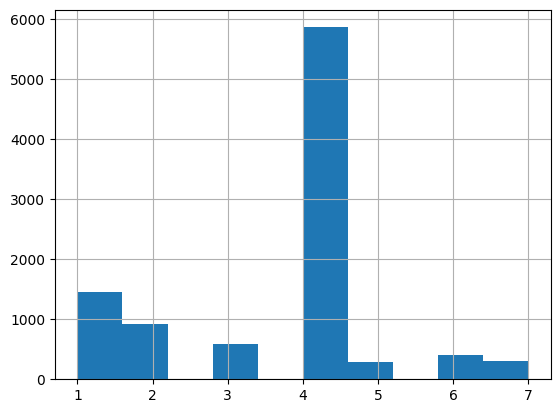

In [19]:
df['cat_1_level_2'].hist()

In [20]:
cat_4_rows = df[df['cat_1_level_2'] == 4]
other_rows = df[df['cat_1_level_2'] != 4]
random.seed(42)  # for reproducibility, you can choose any seed value
cat_4_sampled = cat_4_rows.sample(n=1500, random_state=42)
df_downsampled = pd.concat([other_rows, cat_4_sampled])
df=df_downsampled
df

,message_id,subject,content,cat_1_level_2
2,<14187877.1075857584924.JavaMail.evans@thyme>,amazoncom password assistance,greeting from amazoncom to finish resetting yo...,2
5,<29043641.1075857584989.JavaMail.evans@thyme>,wassup,hey freako how have you been im just taking a ...,2
10,<7789871.1075857584856.JavaMail.evans@thyme>,holiday party,i know it will be close to impossible to get o...,3
12,<4081281.1075857631018.JavaMail.evans@thyme>,mother day,thank you for the beautiful flower they arrive...,2
13,<8847335.1075857631040.JavaMail.evans@thyme>,bnp paribas commodity future ng marketwatch fo...,see attached file gpdf _______________________...,6
...,...,...,...,...
4129,<14940832.1075857675328.JavaMail.evans@thyme>,re px credit schedule f in the pge bankruptcy,bob bill bradford and i have a phone call with...,4
2781,<17048845.1075857605000.JavaMail.evans@thyme>,re,you i guess kim on pm john cc re so who are th...,4
10129,<25311501.1075855603571.JavaMail.evans@thyme>,mike here your morning weather forecast for ho...,imageimage image mike weather for image image ...,4
357,<2151158.1075852688397.JavaMail.evans@thyme>,debriefing our agency on enron business,hello all i would greatly appreciate it if you...,4


<Axes: >

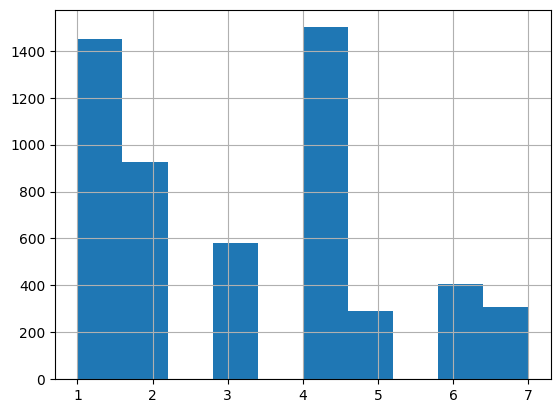

In [21]:
df['cat_1_level_2'].hist()

In [22]:
# Create a new 'label' column based on 'cat_1_level_2'
df['label'] = df['cat_1_level_2'].apply(lambda x: 1.0 + (x / 10.0))

# Map 'label' values to the desired labels
label_mapping = {
    1.1: 'Company Business, Strategy, etc.',
    1.2: 'Purely Personal',
    1.3: 'Personal but in professional context',
    1.4: 'Logistic Arrangements (meeting scheduling, technical support, etc)',
    1.5: 'Employment arrangements(job seeking, hiring, recommendations, etc)',
    1.6: 'Document editing/checking(collaboration)',
    1.7: 'Payroll, finance, accounting etc.',
}

df['label'] = df['label'].map(label_mapping)
df.drop(columns=['cat_1_level_2'], inplace=True)
df

,message_id,subject,content,label
2,<14187877.1075857584924.JavaMail.evans@thyme>,amazoncom password assistance,greeting from amazoncom to finish resetting yo...,Purely Personal
5,<29043641.1075857584989.JavaMail.evans@thyme>,wassup,hey freako how have you been im just taking a ...,Purely Personal
10,<7789871.1075857584856.JavaMail.evans@thyme>,holiday party,i know it will be close to impossible to get o...,Personal but in professional context
12,<4081281.1075857631018.JavaMail.evans@thyme>,mother day,thank you for the beautiful flower they arrive...,Purely Personal
13,<8847335.1075857631040.JavaMail.evans@thyme>,bnp paribas commodity future ng marketwatch fo...,see attached file gpdf _______________________...,Document editing/checking(collaboration)
...,...,...,...,...
4129,<14940832.1075857675328.JavaMail.evans@thyme>,re px credit schedule f in the pge bankruptcy,bob bill bradford and i have a phone call with...,"Logistic Arrangements (meeting scheduling, tec..."
2781,<17048845.1075857605000.JavaMail.evans@thyme>,re,you i guess kim on pm john cc re so who are th...,"Logistic Arrangements (meeting scheduling, tec..."
10129,<25311501.1075855603571.JavaMail.evans@thyme>,mike here your morning weather forecast for ho...,imageimage image mike weather for image image ...,"Logistic Arrangements (meeting scheduling, tec..."
357,<2151158.1075852688397.JavaMail.evans@thyme>,debriefing our agency on enron business,hello all i would greatly appreciate it if you...,"Logistic Arrangements (meeting scheduling, tec..."


In [23]:
df.rename(columns={'content': 'body', 'label': 'category'}, inplace=True)
df.to_csv('simplified_labeled_enron.csv', index=False)
df.head()

,message_id,subject,body,category
2,<14187877.1075857584924.JavaMail.evans@thyme>,amazoncom password assistance,greeting from amazoncom to finish resetting yo...,Purely Personal
5,<29043641.1075857584989.JavaMail.evans@thyme>,wassup,hey freako how have you been im just taking a ...,Purely Personal
10,<7789871.1075857584856.JavaMail.evans@thyme>,holiday party,i know it will be close to impossible to get o...,Personal but in professional context
12,<4081281.1075857631018.JavaMail.evans@thyme>,mother day,thank you for the beautiful flower they arrive...,Purely Personal
13,<8847335.1075857631040.JavaMail.evans@thyme>,bnp paribas commodity future ng marketwatch fo...,see attached file gpdf _______________________...,Document editing/checking(collaboration)


In [24]:
# Split into train and test dataset
original_df = pd.read_csv('simplified_labeled_enron.csv')

# Shuffle the rows randomly
# shuffled_df = original_df.sample(frac=1, random_state=42)  # Use a fixed random_state for reproducibility
shuffled_df = original_df.sample(frac=1)

# Split the DataFrame into two parts
train_df = shuffled_df.iloc[:5000]
test_df = shuffled_df.iloc[5000:]

# Save the two split DataFrames to separate CSV files
train_df.to_csv('simplified_labeled_enron_train.csv', index=False)
test_df.to_csv('simplified_labeled_enron_test.csv', index=False)

In [25]:
# creating prompts for fine-tuning the model
train_df['prompts'] = "<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: " + train_df['body'] + " [/INST] Category: " + train_df['category']
train_df['prompts'][4]

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_95312/471460897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['prompts'] = "<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: " + train_df['body'] + " [/INST] Category: " + train_df['category']


"<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: see attached file gpdf ______________________________________________________________________________ _______________________________________________________ ce message et toutes le piece jointes ciapres le message sont etablis a lintention exclusive de s destinataires et sont confidentiels si vous recevez ce message par erreur merci de le detruire et den avertir immediatement lexpediteur toute utilisation de ce message non conforme a sa destination toute diffusion ou toute publication totale ou partiell

In [26]:
# creating training dataset

prompts_df = pd.DataFrame(columns=['prompts'])
prompts_df['prompts'] = train_df['prompts'].astype(str)
prompts_df = prompts_df.drop(prompts_df[prompts_df['prompts'] == 'nan'].index)
prompts_df.reset_index(drop=True, inplace=True)
prompts_df.to_csv('prompts_train.csv', index=False)
prompts_df

,prompts
0,<s>[INST] <<SYS>> I am sharing an email body w...
1,<s>[INST] <<SYS>> I am sharing an email body w...
2,<s>[INST] <<SYS>> I am sharing an email body w...
3,<s>[INST] <<SYS>> I am sharing an email body w...
4,<s>[INST] <<SYS>> I am sharing an email body w...
...,...
4995,<s>[INST] <<SYS>> I am sharing an email body w...
4996,<s>[INST] <<SYS>> I am sharing an email body w...
4997,<s>[INST] <<SYS>> I am sharing an email body w...
4998,<s>[INST] <<SYS>> I am sharing an email body w...


In [27]:
prompts_df[prompts_df['prompts']=='nan']

,prompts


In [28]:
# # creating testing dataset

test_df['input_test_prompts'] = "<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: " + test_df['body'] + " [/INST] Category: "
prompts_df_test = pd.DataFrame(columns=['input_test_prompts', 'category'])
prompts_df_test['input_test_prompts'] = test_df['input_test_prompts'].astype(str)
prompts_df_test['category'] = test_df['category'].astype(str)
prompts_df_test = prompts_df_test.drop(prompts_df_test[prompts_df_test['input_test_prompts'] == 'nan'].index)
prompts_df_test.reset_index(drop=True, inplace=True)
prompts_df_test.to_csv('prompts_test.csv', index=False)
prompts_df_test

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_95312/1769927879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['input_test_prompts'] = "<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: " + test_df['body'] + " [/INST] Category: "


,input_test_prompts,category
0,<s>[INST] <<SYS>> I am sharing an email body w...,"Employment arrangements(job seeking, hiring, r..."
1,<s>[INST] <<SYS>> I am sharing an email body w...,"Company Business, Strategy, etc."
2,<s>[INST] <<SYS>> I am sharing an email body w...,"Logistic Arrangements (meeting scheduling, tec..."
3,<s>[INST] <<SYS>> I am sharing an email body w...,"Logistic Arrangements (meeting scheduling, tec..."
4,<s>[INST] <<SYS>> I am sharing an email body w...,"Company Business, Strategy, etc."
...,...,...
460,<s>[INST] <<SYS>> I am sharing an email body w...,"Company Business, Strategy, etc."
461,<s>[INST] <<SYS>> I am sharing an email body w...,Purely Personal
462,<s>[INST] <<SYS>> I am sharing an email body w...,"Payroll, finance, accounting etc."
463,<s>[INST] <<SYS>> I am sharing an email body w...,Purely Personal


Checking a few prompts...

In [29]:
prompts_df_test['input_test_prompts'][7]

"<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: i am open to any of your wonderful idea new orleansout [/INST] Category: "

In [30]:
prompts_df_test['input_test_prompts'][6]

"<s>[INST] <<SYS>> I am sharing an email body with you. Based on the text in the body, you need to classify the email in one of the following seven categories: 'Company Business, Strategy, etc.'; 'Purely Personal'; 'Personal but in professional context'; 'Logistic Arrangements (meeting scheduling, technical support, etc)'; 'Employment arrangements(job seeking, hiring, recommendations, etc)'; 'Document editing/checking(collaboration)'; 'Payroll, finance, accounting etc.'. <</SYS>> Mail: thanks for being so nice about me venting i actually tried to call you but you were porbably in bed so i just went to the store grabbed a six pack had a few beer and sat at my computer for until about am i wa really having an enmotional night last night i think i just hadnt let go of my feeling and it all just came out in one night it is funny but the next morning i got call from both price strader and kim kirkwood to see how i wa doing did i ever tell you the story about kim and i at wilson wedding if n